In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import csv 
import qutip
import numpy as np
import qutip
from qiskit import QuantumCircuit
import numpy as np
import QUEVO
from math import ceil
import itertools

In [2]:
mutation_prob = 10
number_of_runs=20
gates = 5 # 5,10,15,20
chromosomes = 20
generations = 100
gate_types = ['cx', 'x', 'h', 'rxx', 'rzz', 'swap', 'z', 'y', 'toffoli']
target_entanglement = [0.999999]


In [3]:
def run_evolution(number_of_runs, probability=5):
    
    plot_list = []
    
    for i in range(0, number_of_runs):
        
        #print('Evolution number: ' + str(i+1))
        init_gen = QUEVO.Generation(chromosomes, gates)
        init_gen.create_initial_generation(gate_types)

        init_gen.run_generation(target_entanglement)  #seeeeeee

        # Final value placeholders
        current_chromosome = init_gen.get_best_chromosome()
        best_chromosome = current_chromosome
        final_fitness = init_gen.get_best_fitness()

        final_fitness_list = [final_fitness]


      # Mutation loop

        for gen in range(0, generations):
            #print('Running gen nr.' + str(gen +1))
            # Mutate next generation of chromosomes
            init_gen.evolve_into_next_generation(probability) # Add probability here!

            # Check every Chromosome's fitness
            init_gen.run_generation(target_entanglement)  #seeeeeeeeeee

            current_fitness = init_gen.get_best_fitness()
            current_chromosome = init_gen.get_best_chromosome()
            print((str(gen + 1)+"\n")+str(current_fitness),end='')
            


            # Check if there is a new_list best chromosome

            if final_fitness > abs(current_fitness):
                final_fitness = current_fitness
                best_chromosome = current_chromosome

            final_fitness_list.append(current_fitness)
            if current_fitness < 0.01:
                break
                
    print("" + str(final_fitness))
    return final_fitness_list
    print("" + current_fitness)






1
0.49999899999999992
0.49999899999999993
0.49999899999999994
0.49999899999999995
0.53825100498896156
0.53825100498896157
0.52536683288401738
0.53825100498896159
0.538251004988961510
0.536030392827111311
0.535900241948446412
0.538251004988961513
0.538251004988961514
0.538251004988961515
0.538251004988961516
0.533223234733039517
0.538251004988961518
0.538251004988961519
0.538251004988961520
0.538251004988961521
0.538251004988961522
0.509655452494209323
0.538251004988961524
0.538251004988961525
0.513822436524218926
0.538251004988961527
0.515837213966345628
0.506947535624018129
0.538251004988961530
0.511217847631213331
0.524455984425261132
0.544955562700843633
0.544955562700843634
0.533863716517386735
0.544955562700843636
0.511724849391379537
0.544955562700843638
0.544955562700843639
0.503705718376888340
0.544955562700843641
0.520303366419553842
0.544955562700843643
0.544955562700843644
0.544955562700843645
0.544955562700843646
0.523404420538978747
0.544955562700843648
0.54495556270084364

0.499998999999999992
0.499998999999999993
0.499998999999999994
0.499998999999999995
0.499998999999999996
0.499998999999999997
0.499998999999999998
0.499998999999999999
0.4999989999999999100
0.49999899999999990.49999899999999986
1
0.49999899999999992
0.49999899999999993
0.49999899999999994
0.49999899999999995
0.54813307769254736
0.49999899999999997
0.49999899999999998
0.49999899999999999
0.499998999999999910
0.499998999999999911
0.499998999999999912
0.499998999999999913
0.499998999999999914
0.499998999999999915
0.499998999999999916
0.499998999999999917
0.499998999999999918
0.499998999999999919
0.499998999999999920
0.499998999999999921
0.499998999999999922
0.499998999999999923
0.499998999999999924
0.499998999999999925
0.499998999999999926
0.499998999999999927
0.502553719263324228
0.499998999999999929
0.499998999999999930
0.499998999999999931
0.499998999999999932
0.499998999999999933
0.499998999999999934
0.499998999999999935
0.502553719263324236
0.499998999999999937
0.502553719263324238
0

0.499998999999999980
0.499998999999999981
0.499998999999999982
0.499998999999999983
0.499998999999999984
0.499998999999999985
0.499998999999999986
0.499998999999999987
0.499998999999999988
0.499998999999999989
0.499998999999999990
0.499998999999999991
0.499998999999999992
0.499998999999999993
0.499998999999999994
0.499998999999999995
0.499998999999999996
0.499998999999999997
0.499998999999999998
0.499998999999999999
0.4999989999999999100
0.49999899999999990.4999989999999999
1
0.49999899999999992
0.49999899999999993
0.49999899999999994
0.49999899999999995
0.49999899999999996
0.49999899999999997
0.49999899999999998
0.49999899999999999
0.519817782933128510
0.519817782933128511
0.499998999999999912
0.499998999999999913
0.499998999999999914
0.499998999999999915
0.5385144471487716
0.499998999999999917
0.499998999999999918
0.5385144471487719
0.499998999999999920
0.499998999999999921
0.499998999999999922
0.505226366621090423
0.505226366621090424
0.517926137561189225
0.534323595886919526
0.4999

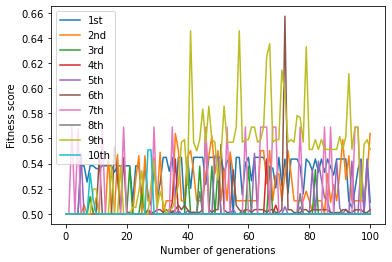

In [4]:

#For plotting No of generation Vs fitness score 

'''plt.plot(run_evolution(1, 0), label="1st")
plt.plot(run_evolution(1, 15), label="2nd")
plt.plot(run_evolution(1, 30), label="3rd")
plt.plot(run_evolution(1, 40), label="4th")
plt.plot(run_evolution(1, 50), label="5th")
plt.plot(run_evolution(1, 60), label="6th")
plt.plot(run_evolution(1, 70), label="7th")
plt.plot(run_evolution(1, 75), label="8th")
plt.plot(run_evolution(1, 80), label="9th")
plt.plot(run_evolution(1, 90), label="10th")
plt.plot(run_evolution(1, 100), label="11th")
plt.plot(run_evolution(1, 105), label="12th")
plt.plot(run_evolution(1, 110), label="13th")
plt.plot(run_evolution(1, 115), label="14th")
plt.plot(run_evolution(1, 120), label="15th")
plt.plot(run_evolution(1, 125), label="16th")
plt.plot(run_evolution(1, 130), label="17th")
plt.plot(run_evolution(1, 135), label="18th")
plt.plot(run_evolution(1, 140), label="19th")
plt.plot(run_evolution(1, 150), label="20th")'''



plt.plot(run_evolution(1, 0), label="1st")
plt.plot(run_evolution(1, 20), label="2nd")
plt.plot(run_evolution(1, 35), label="3rd")
plt.plot(run_evolution(1, 50), label="4th")
plt.plot(run_evolution(1, 70), label="5th")
plt.plot(run_evolution(1, 90), label="6th")
plt.plot(run_evolution(1, 105), label="7th")
plt.plot(run_evolution(1, 120), label="8th")
plt.plot(run_evolution(1, 135), label="9th")
plt.plot(run_evolution(1, 150), label="10th")




plt.xlabel("Number of generations")
plt.ylabel("Fitness score")
# plt.title("Circuit fitness over generations")
plt.legend()
plt.savefig('20diff_gates_30%mutation.pdf')
plt.show()
